In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
euro_option_bs(119.40, 120, 1/12, 0.0154, 0.40, 'call')

5.287301334533069

In [5]:
euro_option_bs(119.40, 120, 1/12, 0.0154, 0.40, 'put')

5.733400108941716

In [6]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

In [7]:
cp

array([[2.73525094e-02],
       [2.40150457e-01],
       [1.07748920e+00],
       [3.14152336e+00],
       [6.86981410e+00],
       [1.23359989e+01],
       [1.93050915e+01],
       [2.74063429e+01],
       [3.62775122e+01],
       [4.56336337e+01],
       [5.52780576e+01]])

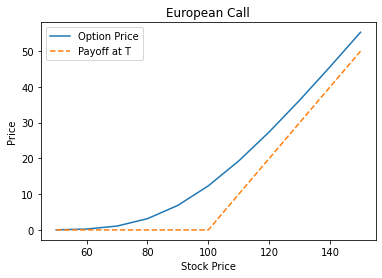

In [8]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [9]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [10]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [11]:
euro_option_bsm(119.70, 120, 1/12, 0.0154, 0.0067, 0.40, 'call')

5.407046511017512

In [12]:
euro_option_bsm(119.70, 120, 1/12, 0.0154, 0.0067, 0.40, 'put')

5.61995913149179

In [14]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))

In [15]:
T = np.linspace(0.25,3,12)
T

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  ])

In [16]:
cpd = np.zeros((len(T),1))

In [17]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

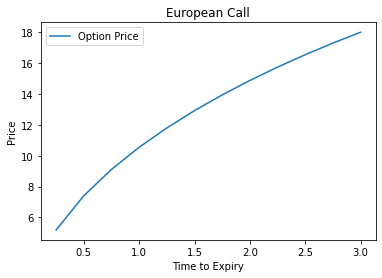

In [18]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [19]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2020-12-11')
opt.calls

ValueError: Expiration `2020-12-11` cannot be found. Available expiration are: [2021-03-12, 2021-03-19, 2021-03-26, 2021-04-01, 2021-04-09, 2021-04-16, 2021-04-23, 2021-05-21, 2021-06-18, 2021-07-16, 2021-09-17, 2021-10-15, 2022-01-21, 2022-06-17, 2022-09-16, 2023-01-20, 2023-03-17]

In [20]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-03-11')
opt.calls

ValueError: Expiration `2021-03-11` cannot be found. Available expiration are: [2021-03-12, 2021-03-19, 2021-03-26, 2021-04-01, 2021-04-09, 2021-04-16, 2021-04-23, 2021-05-21, 2021-06-18, 2021-07-16, 2021-09-17, 2021-10-15, 2022-01-21, 2022-06-17, 2022-09-16, 2023-01-20, 2023-03-17]

In [21]:
pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4040 sha256=a1f9ec150a34395a76018000e6c3ea27f8ebb5e29d82159f5a824d7306c86c29
  Stored in directory: /Users/jamesademuyiwa/Library/Caches/pip/wheels/ac/d2/08/29d18978cfc7a7027fef186a04a809f81a424b421c6dbae25c
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [22]:
import mibian as mb

In [23]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

NameError: name 'r' is not defined

In [24]:
S = data['Adj Close'][-1]

K = opt.calls['strike']

T = 1/12

r = 0.0154

q = 0.0067

log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

vol = np.sqrt(252) * log_return.std() 

vol

NameError: name 'data' is not defined